In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,models

C:\Users\pajag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pajag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4sp5sua7cbgxueoc35yp2asoicyyeqzz.gfortran-win_amd64.dll
C:\Users\pajag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train) ,(x_test,y_test) = mnist.load_data()

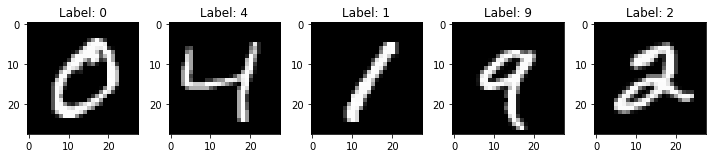

In [4]:
plt.figure(figsize=(10,4))
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train_one_hot, epochs=5, validation_data=(x_test, y_test_one_hot))

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1458 - accuracy: 0.9549 - val_loss: 0.0410 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0628 - val_accuracy: 0.9796
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0292 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0375 - val_accuracy: 0.9891


In [11]:
y_pred_one_hot = model.predict(x_test)

In [12]:
y_pred = np.argmax(y_pred_one_hot, axis=1)

In [13]:
y_true = np.argmax(y_test_one_hot, axis=1)

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

In [15]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

